In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns



In [3]:
alaska_data = pd.read_csv("../datasets/Use for Viz/alaska_single_engine_clean.csv")

1.Geographical Distribution: Plot the locations of the events on a map.

2.Time Series Analysis: Analyze the number of incidents over time (e.g., by year, month, or day).

3.Injury Analysis: Visualize the number of injuries or fatalities per event.

4.Aircraft Types: Show the distribution of events by aircraft make and model.

5.Correlation Heatmap: Examine the correlations between numerical variables.

6.Event Type Distribution: A bar chart of the different event types.

1.Geographical Distribution: Plot the locations of the events on a map.

C:\Users\muham\AppData\Local\Temp\ipykernel_3084\3199577595.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


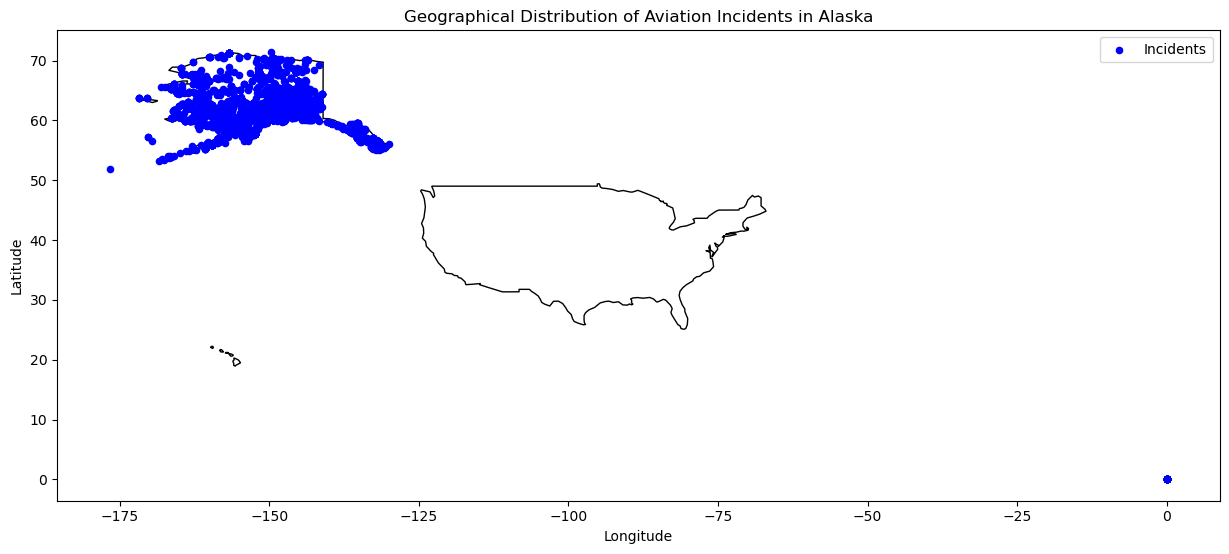

In [4]:


alaska_data['latitude'] = pd.to_numeric(alaska_data['latitude'], errors='coerce') # Ensure correct type (float)
alaska_data['longitude'] = pd.to_numeric(alaska_data['longitude'], errors='coerce')

geo_data = alaska_data.dropna(subset=['latitude', 'longitude'])#

#GeoDataFrame
gdf = gpd.GeoDataFrame(
    geo_data, geometry=gpd.points_from_xy(geo_data.longitude, geo_data.latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
alaska_map = world[(world.name == "United States of America") & (world.continent == "North America")]

fig, ax = plt.subplots(figsize=(15, 15))
alaska_map.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=20, color='blue', marker='o', label='Incidents')
ax.set_title('Geographical Distribution of Aviation Incidents in Alaska')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.show()


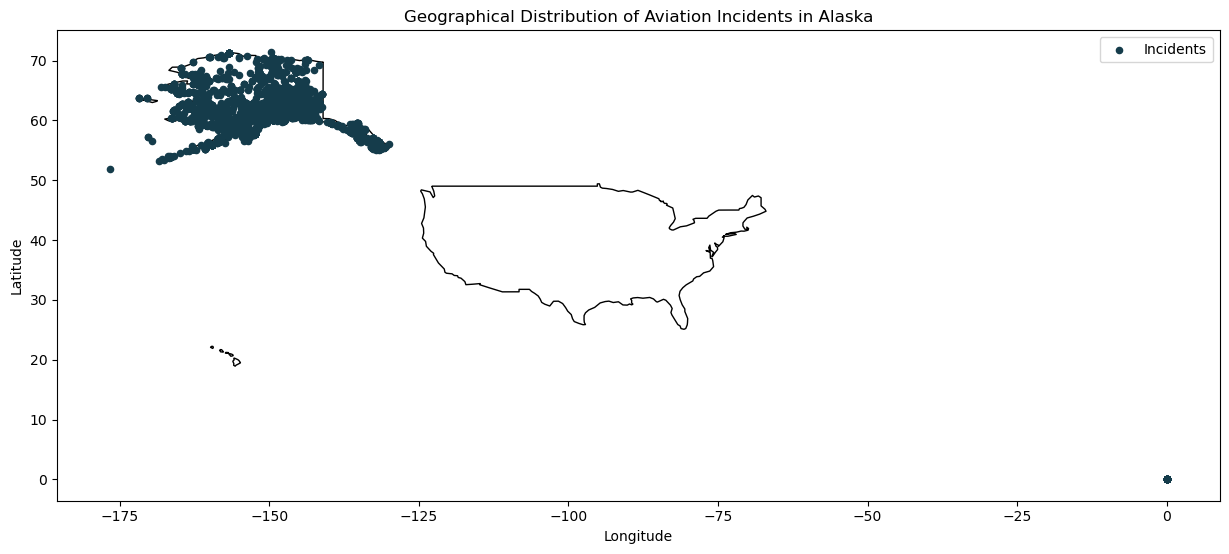

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
alaska_map.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=20, color='#153C4B', marker='o', label='Incidents')  # Using the first color for markers
ax.set_title('Geographical Distribution of Aviation Incidents in Alaska')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()


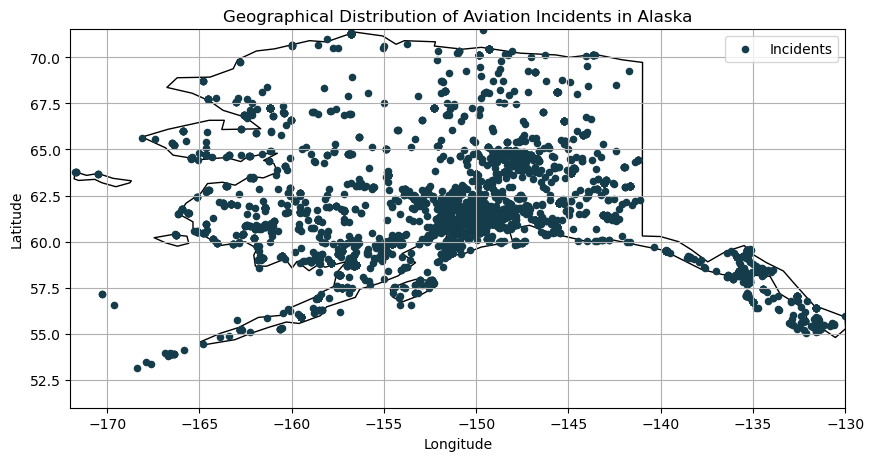

In [16]:
#Zoom In

BBox = (-172.0, -130.0, 51.0, 71.5)
fig, ax = plt.subplots(figsize=(10, 16))
alaska_map.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=20, color='#153C4B', marker='o', label='Incidents')

ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.set_title('Geographical Distribution of Aviation Incidents in Alaska')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid()
plt.legend()
plt.show()


2.Time Series Analysis: Analyze the number of incidents over time (e.g., by year, month, or day).

In [7]:
# unique values 
year_info = (alaska_data['event_year'].unique())
month_info = (alaska_data['event_month'].unique())
day_info = (alaska_data['event_day'].unique())

year_info, month_info, day_info


(array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
        2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
        2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
        1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982], dtype=int64),
 array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64),
 array([24, 20, 18, 16, 15, 12, 10,  2, 30, 28, 27, 22, 17, 14,  9,  4,  1,
        25, 13, 11, 19, 29,  6,  5,  8,  3, 26, 23, 31,  7, 21],
       dtype=int64))

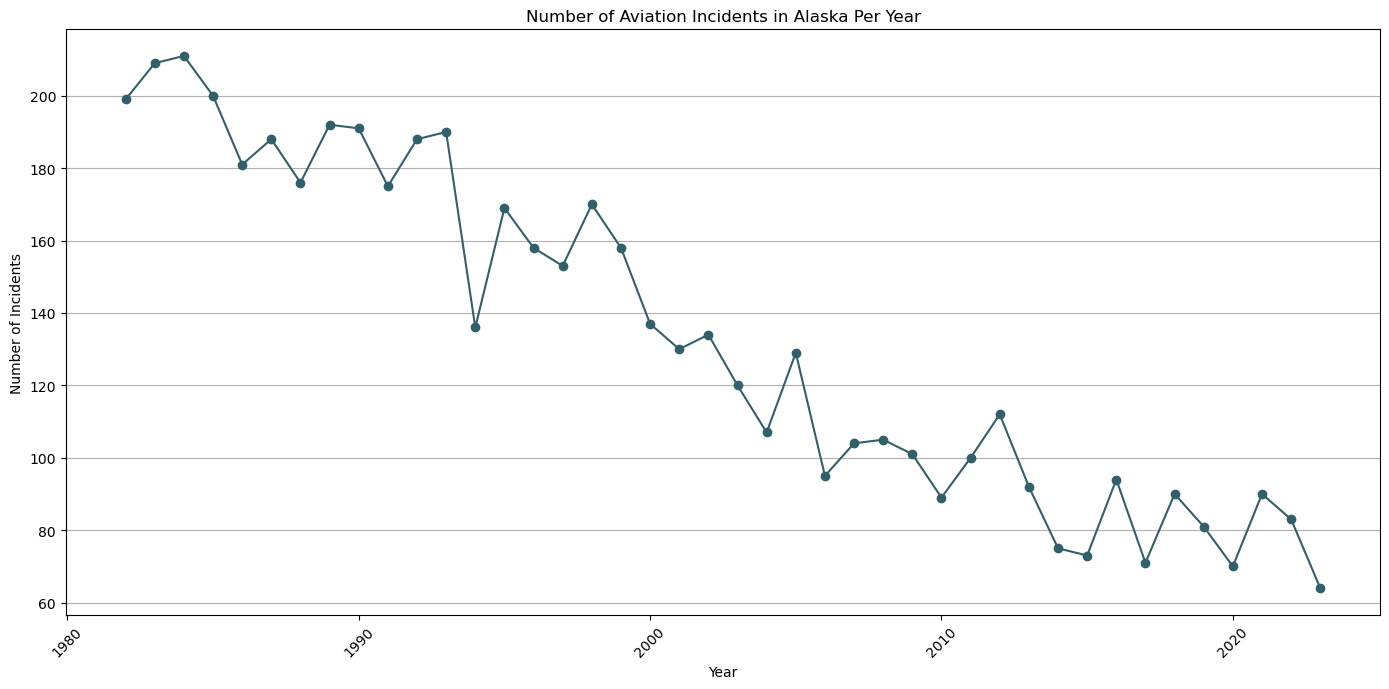

In [27]:
# event_date
alaska_data['event_date'] = pd.to_datetime({
    'year': alaska_data['event_year'],
    'month': alaska_data['event_month'],
    'day': alaska_data['event_day']
})

incidents_per_year = alaska_data.groupby(alaska_data['event_date'].dt.year).size()# Group by event date (year) and count the number of incidents


plt.figure(figsize=(14, 7))
incidents_per_year.plot(kind='line',color='#31606B', marker='o')
plt.title('Number of Aviation Incidents in Alaska Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


3.Injury Analysis: Visualize the number of injuries or fatalities per event.

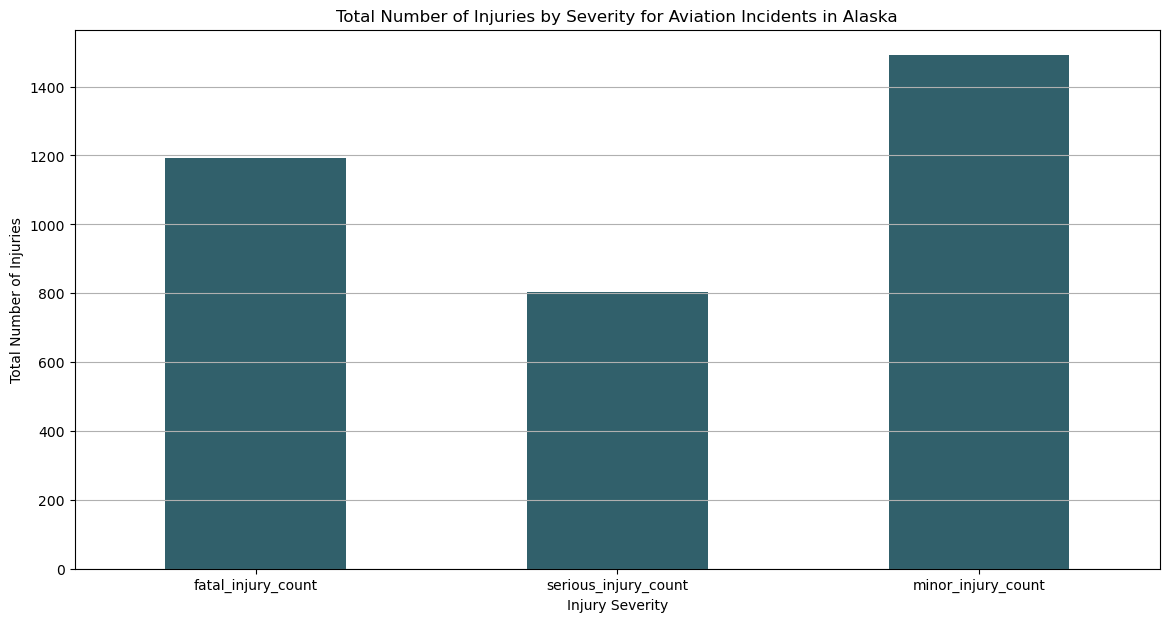

In [26]:
injuries_data = alaska_data[["fatal_injury_count", "serious_injury_count", "minor_injury_count"]]

plt.figure(figsize=(14, 7))
injuries_data.sum().plot(kind='bar', color='#31606B', stacked=True)
plt.title('Total Number of Injuries by Severity for Aviation Incidents in Alaska')
plt.xlabel('Injury Severity')
plt.ylabel('Total Number of Injuries')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


4.Aircraft Types: Show the distribution of events by aircraft make and model.

       4.1 Top 10 most common makes and models involved in incidents

In [10]:
filtered_data = alaska_data[alaska_data['aircraft_family'] != 'UNCOMMON FAMILY']

top_makes_models = filtered_data['aircraft_family'].value_counts().head(10)


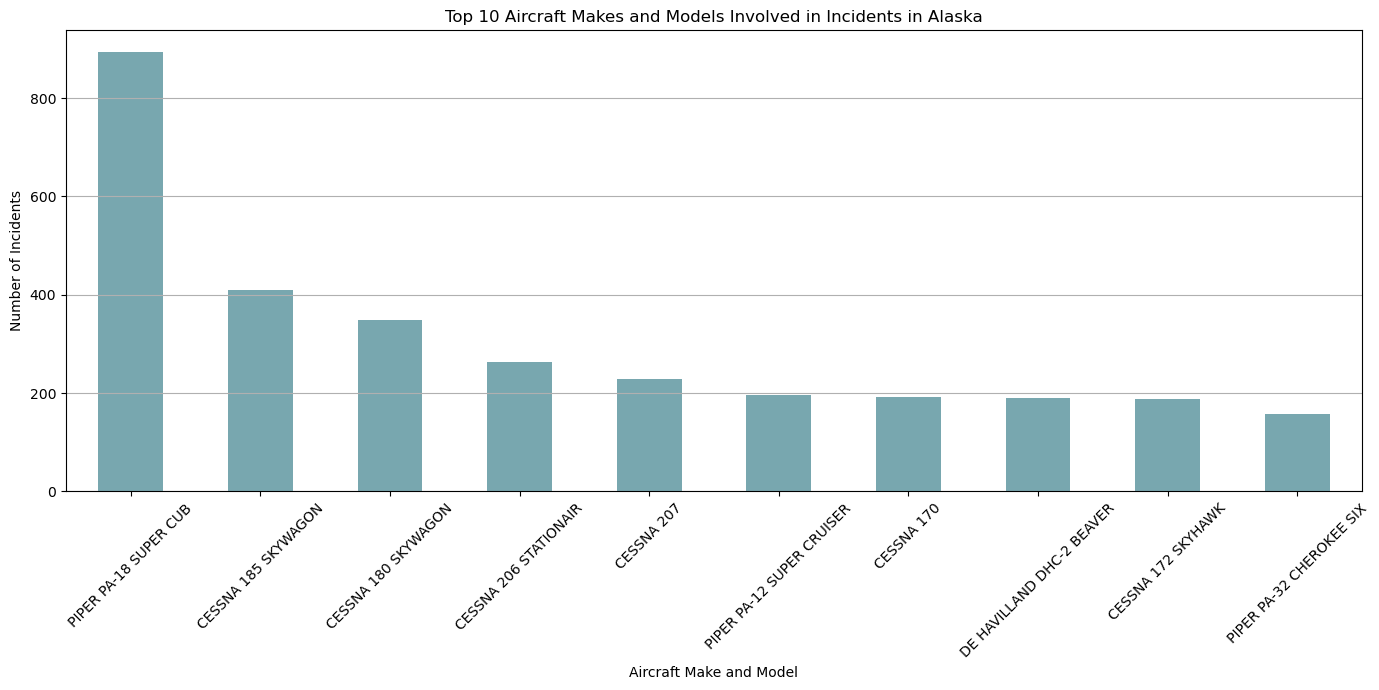

In [24]:

plt.figure(figsize=(14, 7))
top_makes_models.plot(kind='bar', color='#78A7AF')
plt.title('Top 10 Aircraft Makes and Models Involved in Incidents in Alaska')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


6.Event Type Distribution: A bar chart of the different event types. # needs total numbers of flights

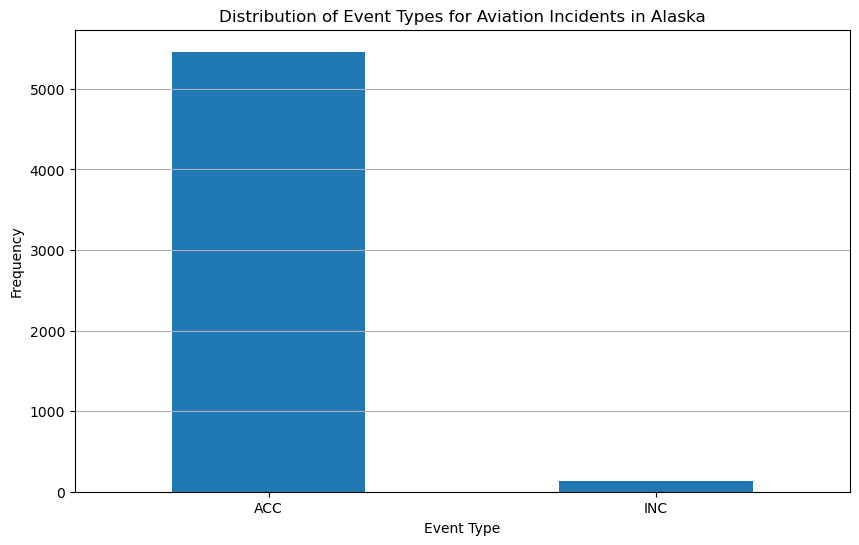

In [12]:
event_type_counts = alaska_data['event_type'].value_counts()

plt.figure(figsize=(10, 6))
event_type_counts.plot(kind='bar')
plt.title('Distribution of Event Types for Aviation Incidents in Alaska')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
